In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 1. Load the data
url = "/kaggle/input/ml-household-power-consumption/household_power_consumption.csv"
data = pd.read_csv(url, sep=';', na_values='?')
# Combine Date and Time
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' +
data['Time'], dayfirst=True)
data.drop(columns=['Date', 'Time'], inplace=True)
data.set_index('Datetime', inplace=True)
# Convert numeric columns
cols_to_numeric = ['Global_active_power',
'Global_reactive_power', 'Voltage',
'Global_intensity', 'Sub_metering_1',
'Sub_metering_2', 'Sub_metering_3']
data[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [20]:
# 2. Detect Missing Values and Outliers
print("Missing Values:\n", data.isnull().sum())
# Drop rows with missing values
data.dropna(inplace=True)
# Detect outliers in Global_active_power
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Global_active_power'] < (Q1 - 1.5 *
IQR)) |
(data['Global_active_power'] > (Q3 + 1.5 *
IQR))]
print("Outliers detected:", len(outliers))

Missing Values:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Outliers detected: 94907


In [21]:
# 3. Subset Data: December 2006 and November 2009
dec_2006 = data.loc['2006-12']
nov_2009 = data.loc['2009-11']
subset_data = pd.concat([dec_2006, nov_2009])

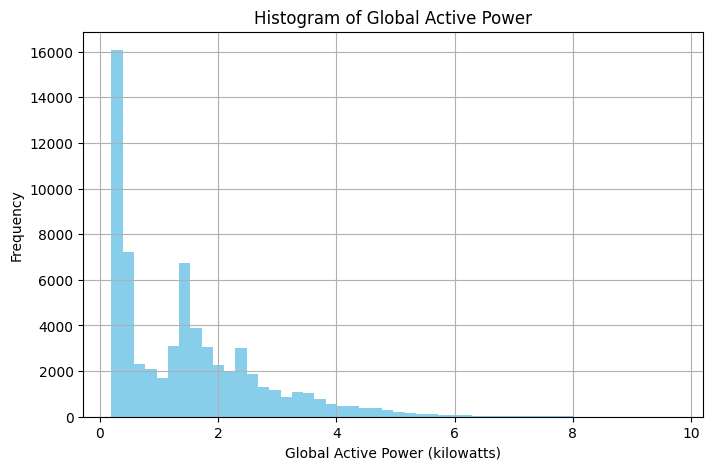

In [24]:
# 4. Histogram
plt.figure(figsize=(8,5))
subset_data['Global_active_power'].hist(bins=50,
color='skyblue')
plt.title('Histogram of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

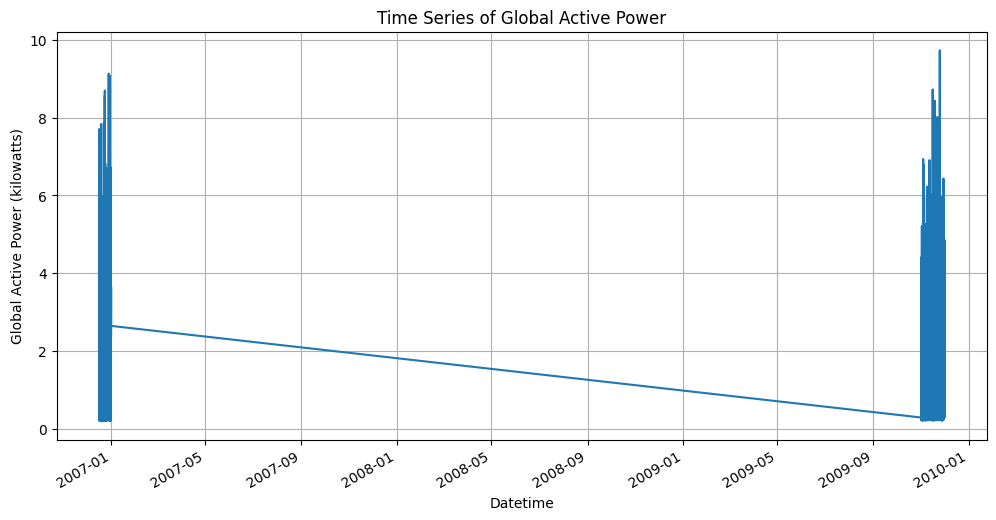

In [25]:
# 5. Time Series Plot
plt.figure(figsize=(12,6))
subset_data['Global_active_power'].plot()
plt.title('Time Series of Global Active Power')
plt.ylabel('Global Active Power (kilowatts)')
plt.xlabel('Datetime')
plt.grid(True)
plt.show()

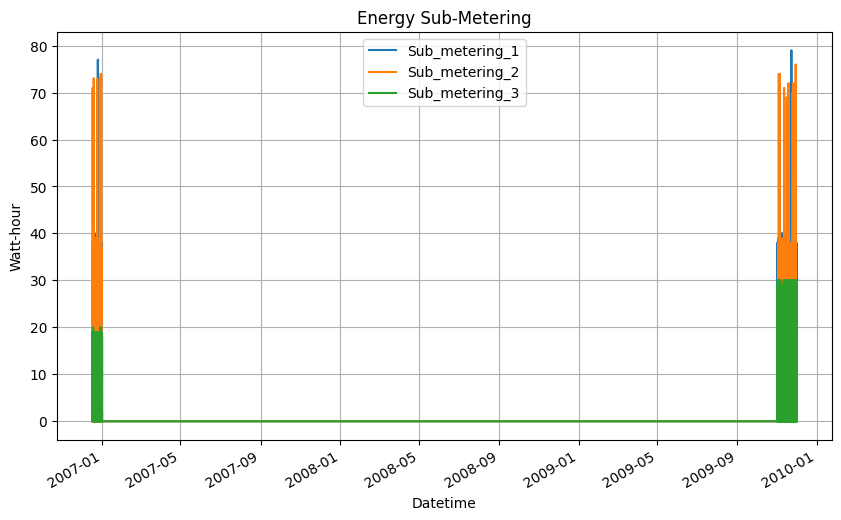

In [26]:
# 6. Sub-Metering Plot
plt.figure(figsize=(10,6))
subset_data['Sub_metering_1'].plot(label='Sub_metering_1')
subset_data['Sub_metering_2'].plot(label='Sub_metering_2')
subset_data['Sub_metering_3'].plot(label='Sub_metering_3')
plt.legend()
plt.title('Energy Sub-Metering')
plt.ylabel('Watt-hour')
plt.grid(True)
plt.show()

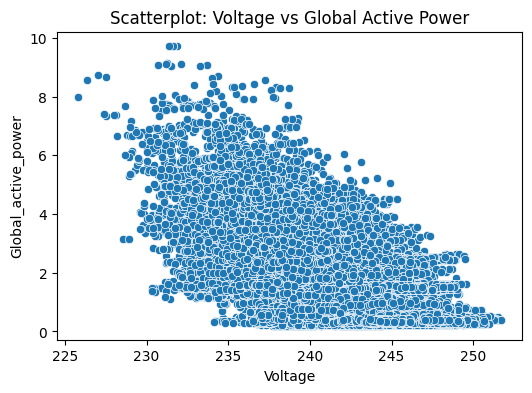

In [27]:
# 7. Multiple Plots
# Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Voltage', y='Global_active_power',
data=subset_data)
plt.title("Scatterplot: Voltage vs Global Active Power")
plt.show()

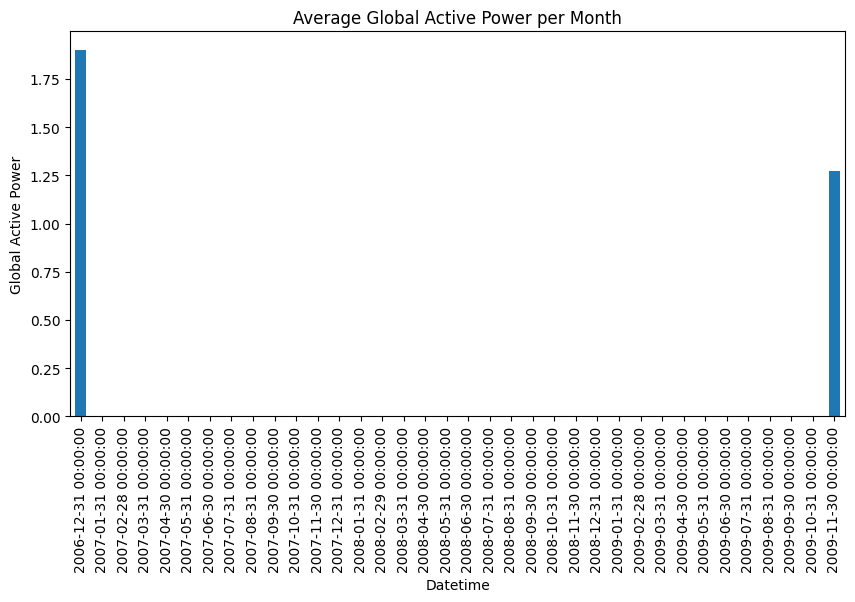

In [28]:
# Bar Chart (Average Power per Month)
monthly_avg = subset_data.resample('ME').mean()
monthly_avg['Global_active_power'].plot(kind='bar',
figsize=(10,5))
plt.title("Average Global Active Power per Month")
plt.ylabel("Global Active Power")
plt.show()

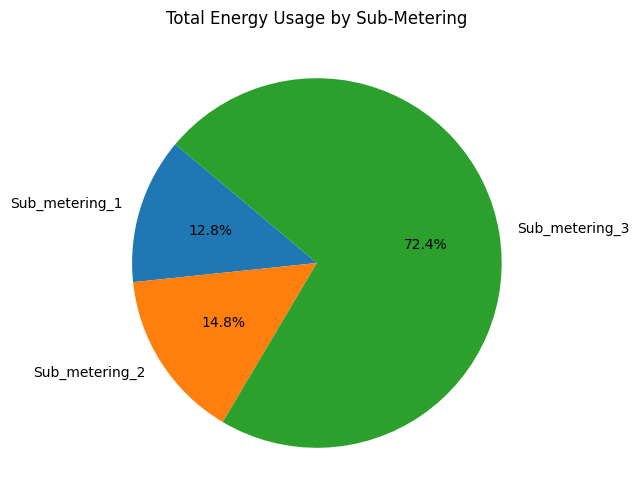

In [30]:
# Pie Chart (Total Energy by Sub Metering)
sub_totals = subset_data[['Sub_metering_1',
'Sub_metering_2', 'Sub_metering_3']].sum()
plt.figure(figsize=(6,6))
plt.pie(sub_totals, labels=sub_totals.index,
autopct='%1.1f%%', startangle=140)
plt.title("Total Energy Usage by Sub-Metering")
plt.show()

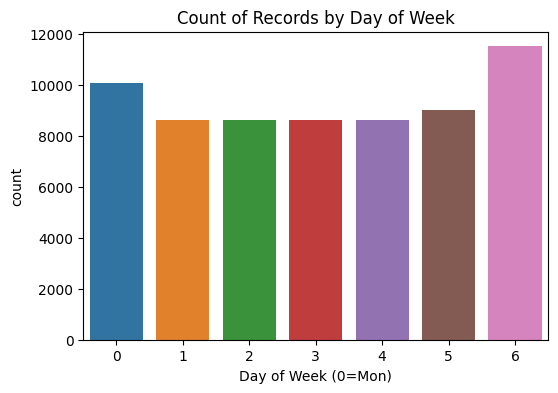

In [ ]:
# Countplot (Days of Week)
plt.figure(figsize=(6,4))
sns.countplot(x=subset_data.index.dayofweek)
plt.title("Count of Records by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.show()

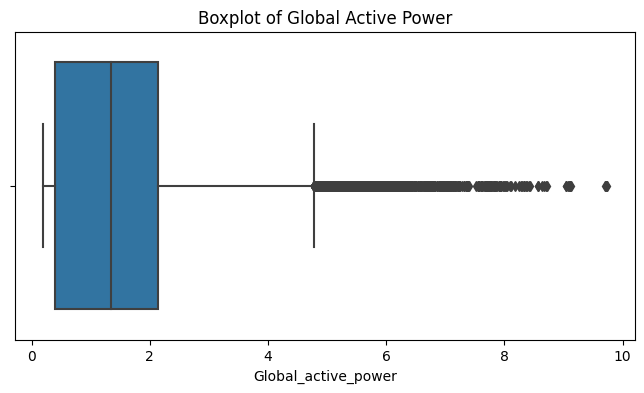

In [32]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=subset_data['Global_active_power'])
plt.title("Boxplot of Global Active Power")
plt.show()

<Axes: >

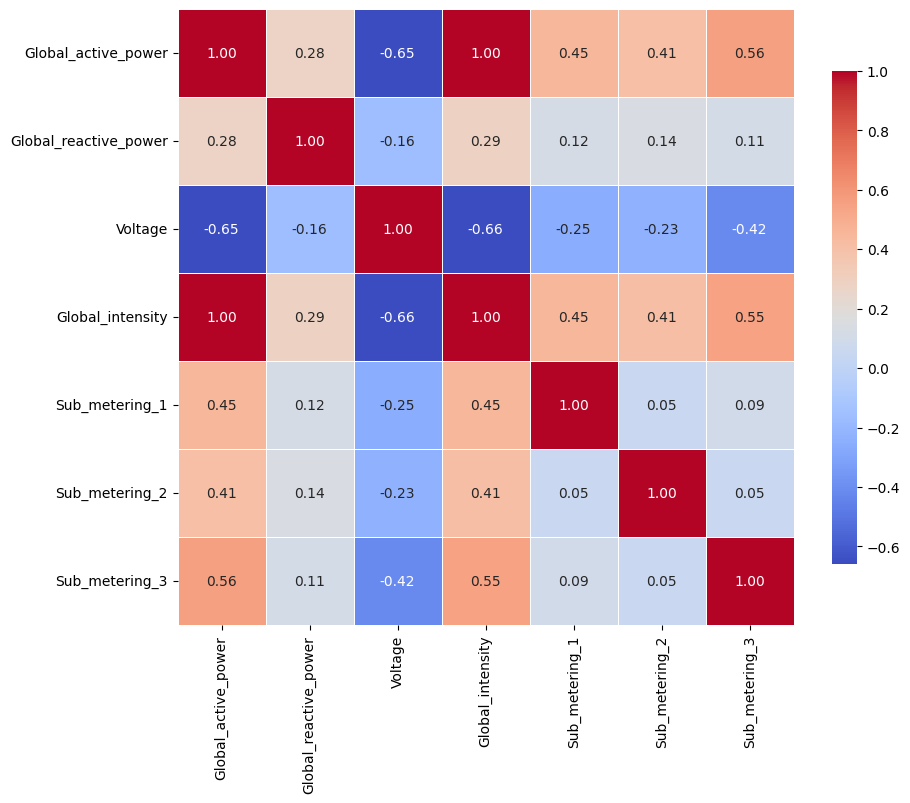

In [33]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True,
cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
cbar_kws={"shrink": 0.8}, annot_kws={"size":
10})

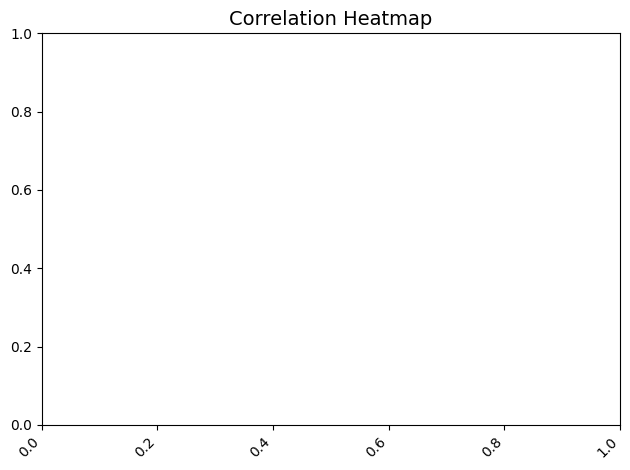

In [34]:
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


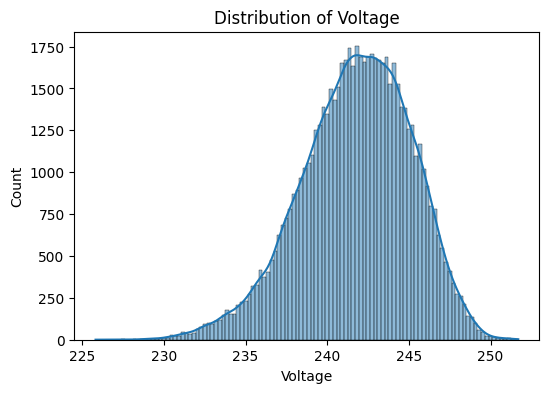

In [35]:
# Distplot (using histplot with KDE)
plt.figure(figsize=(6,4))
sns.histplot(subset_data['Voltage'], kde=True)
plt.title("Distribution of Voltage")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


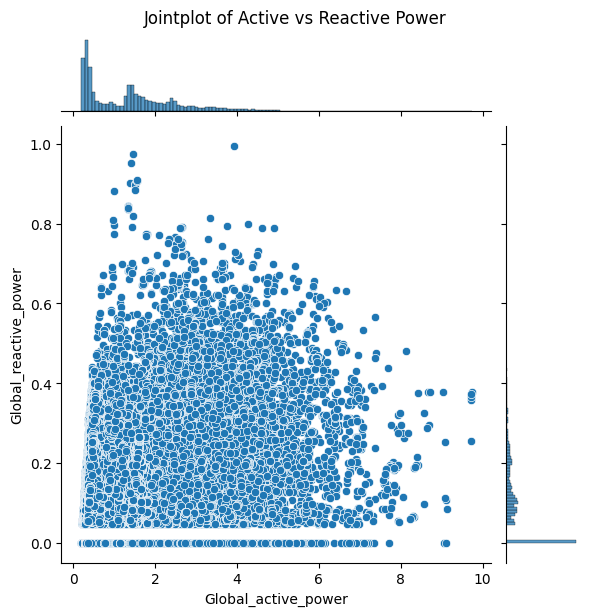

In [36]:
# Jointplot
sns.jointplot(x='Global_active_power',
y='Global_reactive_power', data=subset_data,
kind='scatter')
plt.suptitle("Jointplot of Active vs Reactive Power",
y=1.02)
plt.show()